In [83]:
import numpy as np 
import pandas as pd 
import os
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [84]:
district_2019_lowperf = pd.read_csv('2019_lowperf_district.csv')
guilford_2019_s = pd.read_csv('2019_lowperf_guilford.csv')
carrboro_2019_s = pd.read_csv('2019_lowperf_carrboro.csv')

nc_2019_p = pd.read_csv('2019_Personnel_All_Public.csv')
carrborro_2019_p = pd.read_csv('2019_Personnel_Carrboro.csv')
guilford_2019_p = pd.read_csv('2019_Personnel_Guilford.csv')

In [85]:
df_lowperf = pd.read_csv('Report Cards/rcd_acc_lowperf.csv') #low performing schools
df_spg2 = pd.read_csv('Report Cards/rcd_acc_spg2.csv') #school performance grades


## DF_STUDENTS FEATURE ENGINEERING

In [86]:
# district_2019_lowperf.drop(columns=['year', 'agency_code'], inplace=True)
# nc_2019_p.drop(columns=['Unnamed: 6', 'Unnamed: 9'], inplace=True)
# district_2019_lowperf.head()

In [87]:
# # guilford_2019_s.rename(columns={'_____LEA Name_____':'LEA Name'}, inplace=True) # REMOVE UNNECESSARY UNDERSCORES

# # REPLACE NAN VALUES WITH 0
# guilford_2019_s['School'].fillna(0, inplace=True)
# guilford_2019_s['LEA'].fillna(0, inplace=True)
# guilford_2019_s['lp_num'].fillna(0, inplace=True)
# guilford_2019_s['lp_den'].fillna(0, inplace=True)
# guilford_2019_s['lp_pct'].fillna(0, inplace=True)
# guilford_2019_s['lp_district'].fillna(0, inplace=True)

# # guilford_2019_s.rename(columns={'TWO OR MOREFemale':'TWO OR MORE Female'}, inplace=True)

# # LIST OF COLUMNS TO CONVERT TO TYPE INT
# convert_s = ['LEA', 'INDIAN Male', 'INDIAN Female', 'ASIAN Male', 'ASIAN Female', 'HISPANIC Male',
#        'HISPANIC Female', 'BLACK Male', 'BLACK Female', 'WHITE Male',
#        'WHITE Female', 'PACIFIC ISLAND  Male', 'PACIFIC ISLAND  Female',
#        'TWO OR MORE Male', 'TWO OR MORE Female', 'Total' ]

# convert_p = nc_2019_p.columns[2:11]

# #REMOVE COMMAS SO VALUES CAN BE CONVERTED TO NUMERIC
# district_2019_lowperf[convert_s] = district_2019_lowperf[convert_s].replace({',':''}, regex=True)
# guilford_2019_s[convert_s] = guilford_2019_s[convert_s].replace({',':''}, regex=True)
# nc_2019_p[convert_p] = nc_2019_p[convert_p].replace({',':''}, regex=True)
# guilford_2019_p[convert_p] = guilford_2019_p[convert_p].replace({',':''}, regex=True)


# #CONVERT VALUES TO NUMERIC
# district_2019_lowperf[convert_s] = district_2019_lowperf[convert_s].apply(pd.to_numeric)
# guilford_2019_s[convert_s] = guilford_2019_s[convert_s].apply(pd.to_numeric)

# nc_2019_p[convert_p] = nc_2019_p[convert_p].apply(pd.to_numeric)
# guilford_2019_p[convert_p] = guilford_2019_p[convert_p].apply(pd.to_numeric)


# #CONVERT FROM FLOAT TO INT
# # district_2019_lowperf['School'] = district_2019_lowperf['School'].astype(int)
# district_2019_lowperf['LEA'] = district_2019_lowperf['LEA'].astype(int)




In [88]:
# #SAVE ALTERED DATA SETS
# district_2019_lowperf.to_csv('2019_lowperf_district.csv', index=False)
# guilford_2019_s.to_csv('2019_lowperf_guilford.csv', index=False)
# nc_2019_p.to_csv('2019_Personnel_All_Public.csv', index=False)
# guilford_2019_p.to_csv('2019_Personnel_Guilford.csv', index=False)



In [89]:
# #ISOLATE LOW PERFORMANCE DATA FOR GUILFORD (410)
# lowperf_410 = df_lowperf.loc[(df_lowperf['agency_code'].str[0:3] == '410') & (df_lowperf['year'] == 2019)]
# lowperf_410 = lowperf_410.reset_index()
# lowperf_410.drop(columns=['index'], inplace=True)

In [90]:
# #CREATE NEW COLUMNS IN GUILFORD_2019_S DATASET

# guilford_2019_s['lp_school'] = np.nan
# guilford_2019_s['rlp_school'] = np.nan
# guilford_2019_s['clpc_school'] = np.nan

In [91]:
# #PLACE LOW PERFORMANCE DATA INTO GUILFORD_2019_S DATASET

# a = 0
# b = 0
# c = 0

# lp_school = []
# rlp_school = []
# clpc_school = []

# for i in lowperf_410['lp_school']:
#     if lowperf_410['agency_code'][a][-3:] == guilford_2019_s['School'][a].astype(str):
#         lp_school.append(i)
#     a = a+1

# for i in lowperf_410['rlp_school']:
#     if lowperf_410['agency_code'][b][-3:] == guilford_2019_s['School'][b].astype(str):
#         rlp_school.append(i)
#     b = b+1

# for i in lowperf_410['clpc_school']:
#     if lowperf_410['agency_code'][c][-3:] == guilford_2019_s['School'][c].astype(str):
#         clpc_school.append(i)
#     c = c+1


# guilford_2019_s['lp_school'][0:125] = lp_school
# guilford_2019_s['rlp_school'][0:125] = rlp_school
# guilford_2019_s['clpc_school'][0:125] = clpc_school

# guilford_2019_s.tail(5)

In [92]:
# guilford_2019_p.drop(guilford_2019_p[guilford_2019_p['Role'] == 'Subtotal'].index, inplace=True)
# guilford_2019_p.reset_index(inplace=True)
# guilford_2019_p.drop(columns={'index', 'Unnamed: 6', 'Unnamed: 9'}, inplace=True)
# guilford_2019_p.drop([18,19], inplace=True)

In [93]:
# guilford_2019_p['Role'][0:3] = 'Administrators'
# guilford_2019_p['Role'][3:6] = 'Teachers'
# guilford_2019_p['Role'][6:11] = 'Professionals'
# guilford_2019_p['Role'][11:17] = 'Others'

# guilford_2019_p

In [98]:
# ISOLATE WH7 SCORES 
wh7_2019 = df_spg2.loc[(df_spg2['year'] == 2019) & (df_spg2['subgroup'] == 'WH7')]
wh7_2019.reset_index(inplace=True)
wh7_2019.drop(columns=['index'], inplace=True)

for i in wh7_2019['agency_code']:
    if i[0:3] != '410':
        wh7_2019.drop(wh7_2019[wh7_2019['agency_code'] == i].index, inplace=True)

        
# ISOLATE BL7 SCORES         
bl7_2019 = df_spg2.loc[(df_spg2['year'] == 2019) & (df_spg2['subgroup'] == 'BL7')]
bl7_2019.reset_index(inplace=True)
bl7_2019.drop(columns=['index'], inplace=True)

for i in bl7_2019['agency_code']:
    if i[0:3] != '410':
        bl7_2019.drop(bl7_2019[bl7_2019['agency_code'] == i].index, inplace=True)

        
# ISOLATE HI7 SCORES         
hi7_2019 = df_spg2.loc[(df_spg2['year'] == 2019) & (df_spg2['subgroup'] == 'HI7')]
hi7_2019.reset_index(inplace=True)
hi7_2019.drop(columns=['index'], inplace=True)

for i in hi7_2019['agency_code']:
    if i[0:3] != '410':
        hi7_2019.drop(hi7_2019[hi7_2019['agency_code'] == i].index, inplace=True)

In [99]:
wh7_410_2019 = wh7_2019
wh7_410_2019.reset_index(inplace=True)
wh7_410_2019.drop(columns=['index'], inplace=True)

bl7_410_2019 = bl7_2019
bl7_410_2019.reset_index(inplace=True)
bl7_410_2019.drop(columns=['index'], inplace=True)

hi7_410_2019 = hi7_2019
hi7_410_2019.reset_index(inplace=True)
hi7_410_2019.drop(columns=['index'], inplace=True)

In [100]:
# APPEND READING/MATH SCORES TO GUILFORD_2019_S DATA SET

a = 0
b = 0
white_rmscore = []
guilford_2019_s['white_rmscore'] = np.nan   

for i in wh7_410_2019['reading_math_score']:
    if wh7_410_2019['agency_code'][a][-3:] == guilford_2019_s['School'][b].astype(str):
        guilford_2019_s['white_rmscore'][a] = i
        a = a+1
        b = b+1
    else:
        guilford_2019_s['white_rmscore'][b] = 0
        a = a+0
        b = b+1
        

In [101]:
# a = 0
# b = 0
# black_rmscore = []
# guilford_2019_s['black_rmscore'] = np.nan   

# for i in bl7_410_2019['reading_math_score']:
#     if bl7_410_2019['agency_code'][a][-3:] == guilford_2019_s['School'][b].astype(str):
#         guilford_2019_s['black_rmscore'][a] = i
#         a = a+1
#         b = b+1
#     else:
#         guilford_2019_s['black_rmscore'][b] = 0
#         a = a+0
#         b = b+1

# EXPLORATORY DATA ANALYSIS

In [102]:
lp_values = guilford_2019_s['lp_school'].value_counts().to_frame().reset_index()
lp_values.rename(columns={'lp_school':'count', 'index':'LP_School'}, inplace=True)

guilford_lowperf_y = guilford_2019_s.loc[guilford_2019_s['lp_school'] == 'Y']
guilford_lowperf_n = guilford_2019_s.loc[guilford_2019_s['lp_school'] == 'N']

In [103]:
lp_values

,LP_School,count
0,N,75
1,Y,33


In [104]:
guilford_lowperf_y.tail()

,Year,LEA,LEA_Name,School,School Name,INDIAN Male,INDIAN Female,ASIAN Male,ASIAN Female,HISPANIC Male,...,year,agency_code,lp_school,rlp_school,clpc_school,lp_num,lp_den,lp_pct,lp_district,white_rmscore
90,2019,410,Guilford County Schools,542,George C Simkins Jr Elementary,1,4,9,4,63,...,2019,410542,Y,Y,N,0.0,0.0,0.0,0.0,0.0
99,2019,410,Guilford County Schools,577,Sumner Elementary,2,1,4,0,107,...,2019,410577,Y,Y,N,0.0,0.0,0.0,0.0,NaN
103,2019,410,Guilford County Schools,583,Vandalia Elementary,1,0,2,1,23,...,2019,410583,Y,Y,N,0.0,0.0,0.0,0.0,NaN
106,2019,410,Guilford County Schools,592,Welborn Middle,0,1,6,18,51,...,2019,410592,Y,Y,N,0.0,0.0,0.0,0.0,NaN
107,2019,410,Guilford County Schools,598,Wiley Accel/Enrichment,1,0,0,0,10,...,2019,410598,Y,Y,N,0.0,0.0,0.0,0.0,NaN


In [106]:
print(guilford_lowperf_y['WHITE Male'].sum() + guilford_lowperf_n['WHITE Male'].sum())

6911


In [107]:
district_2019_lowperf.columns

Index(['Year', 'LEA', 'LEA Name', 'INDIAN Male', 'INDIAN Female', 'ASIAN Male',
       'ASIAN Female', 'HISPANIC Male', 'HISPANIC Female', 'BLACK Male',
       'BLACK Female', 'WHITE Male', 'WHITE Female', 'PACIFIC ISLAND  Male',
       'PACIFIC ISLAND  Female', 'TWO OR MORE Male', 'TWO OR MORE Female',
       'Total', 'lp_school', 'rlp_school', 'clpc_school', 'lp_num', 'lp_den',
       'lp_pct', 'lp_district'],
      dtype='object')

In [108]:
nc_2019_p.head()

,Role,Activity Assignment Classification,State Funds,Fed Funds,Local Funds,Total Funds,Gender Male,Gender Female,Race White,Race Black,Race Other
0,Administrators,"Official Adm., Mgrs.",909,128,955,1992,847,1133,1518,413,61
1,Administrators,Principals,2389,4,57,2450,931,1502,1770,612,68
2,Administrators,"Ast. Principals, Nonteaching",1987,22,934,2943,1046,1852,1890,946,107
3,Admin Subtotal,NaN,5285,154,1946,7385,2824,4487,5178,1971,236
4,Teachers,Elementary Teachers,44647,2778,3458,50883,5482,43973,40608,7390,2885


In [109]:
nc_2019_p.iloc[7][8:11]

Race White    73460
Race Black    14663
Race Other     5274
Name: 7, dtype: object

## 2019 NORTH CAROLINA TEACHER DEMOGRAPHICS

First we'll take a look at the teacher demographics for all public schools in North Carolina for the year 2019

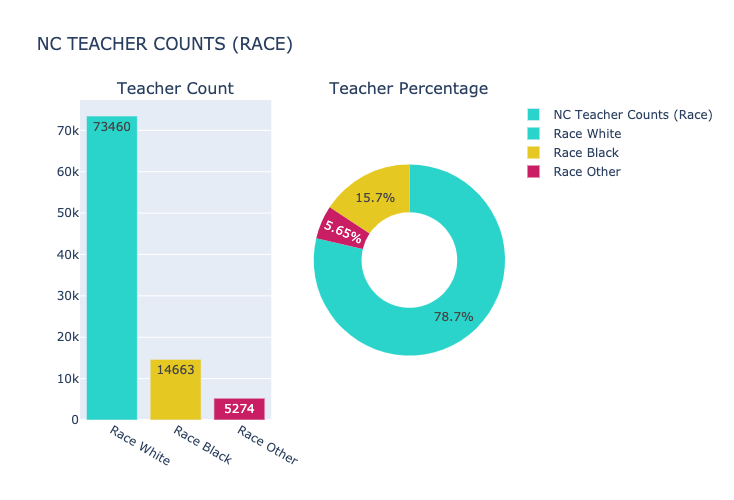

In [110]:
columns = nc_2019_p.columns[8:11]
values = nc_2019_p.iloc[7][8:11]

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Teacher Count', 'Teacher Percentage'))

fig.add_trace(go.Bar(x=columns, 
                     y=values,
                     name='NC Teacher Counts (Race)', 
                     text=values,
                     textposition = 'auto',
                     marker=dict(color=['#2ad4cb','#e6c822', '#c91e63'])), row=1, col=1)

fig.add_trace(go.Pie(labels=columns, 
                     values=values, 
                     name='Teacher Percentage',
                     hole = 0.5,
                     marker=dict(colors=['#2ad4cb','#e6c822', '#c91e63'])), row=1, col=2)

fig.update_layout(height=500, 
                  title_text='NC TEACHER COUNTS (RACE)',
                  showlegend=True)

fig.show()

## 2019 NORTH CAROLINA STUDENT DEMOGRAPHICS

Next we'll take a look at the teacher demographics for all public schools in North Carolina for 2019

In [111]:
indian = (district_2019_lowperf['INDIAN Male'].sum() + district_2019_lowperf['INDIAN Female'].sum())
asian = (district_2019_lowperf['ASIAN Male'].sum() + district_2019_lowperf['ASIAN Female'].sum())
hispanic = (district_2019_lowperf['HISPANIC Male'].sum() + district_2019_lowperf['HISPANIC Female'].sum())
black = (district_2019_lowperf['BLACK Male'].sum() + district_2019_lowperf['BLACK Female'].sum())
white = (district_2019_lowperf['WHITE Male'].sum() + district_2019_lowperf['WHITE Female'].sum())
pacific = (district_2019_lowperf['PACIFIC ISLAND  Male'].sum() + district_2019_lowperf['PACIFIC ISLAND  Female'].sum())
twoormore = (district_2019_lowperf['TWO OR MORE Male'].sum() + district_2019_lowperf['TWO OR MORE Female'].sum())

values_s = [white, black, hispanic, asian, indian, pacific, twoormore]
columns_s = ['White', 'Black', 'Hispanic', 'Asian', 'Indian', 'Pacific', 'Two+']

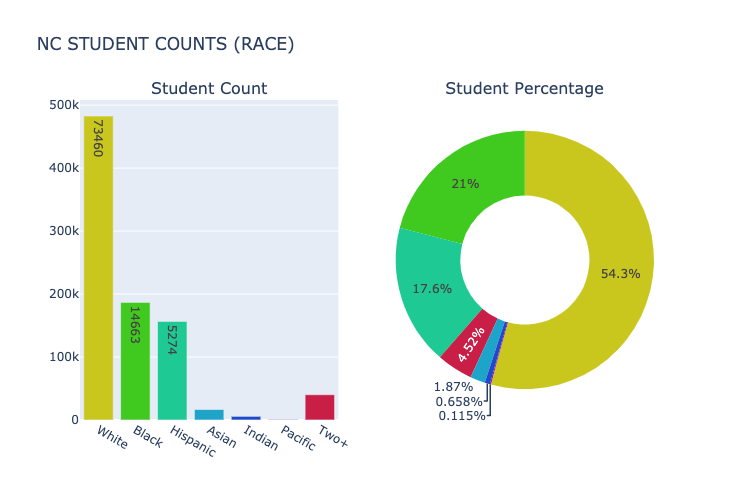

In [112]:
colors = ['#c9c61e', '#40c91e', '#1ec993', '#1ea4c9', '#1e49c9', '#991ec9', '#c91e46']

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Student Count', 'Student Percentage'))

fig.add_trace(go.Bar(x=columns_s, 
                     y=values_s,
                     name='NC Student Counts (Race)', 
                     text=values,
                     textposition = 'auto',
                     marker=dict(color=colors)), row=1, col=1)

fig.add_trace(go.Pie(labels=columns_s, 
                     values=values_s, 
                     name='Student Percentage',
                     hole = 0.5,
                     marker=dict(colors=colors)), row=1, col=2)


fig.update_layout(height=500, 
                  width = 850,
                  title_text='NC STUDENT COUNTS (RACE)',
                  showlegend=False)
fig.show()

## 2019 NORTH CAROLINA LOW PERFORMING SCHOOLS

In [113]:
lowperf_2019 = df_lowperf[df_lowperf['year'] == 2019]
lowperf_cnt_2019 = lowperf_2019['lp_school'].value_counts().to_frame()
lowperf_cnt_2019.reset_index(inplace=True)
lowperf_cnt_2019.rename(columns={'lp_school':'count', 'index':'lp_school'}, inplace=True)


In [114]:
lowperf_cnt_2019

,lp_school,count
0,N,2166
1,Y,488


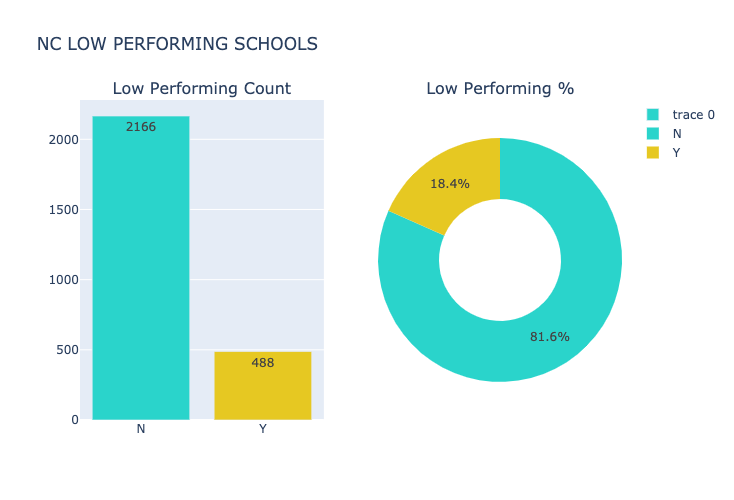

In [127]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Low Performing Count', 'Low Performing %'))

fig.add_trace(go.Bar(x=lowperf_cnt_2019['lp_school'], 
                     y=lowperf_cnt_2019['count'],
                     text=lowperf_cnt_2019['count'],
                     textposition = 'auto',
                     marker=dict(color=['#2ad4cb','#e6c822'])), row=1, col=1)

fig.add_trace(go.Pie(labels=lowperf_cnt_2019['lp_school'], 
                     values=lowperf_cnt_2019['count'], 
                     name='NC Low Performing Schools %',
                     hole = 0.5,
                     marker=dict(colors=['#2ad4cb','#e6c822'])), row=1, col=2)

fig.update_layout(height=500, 
                  title_text='NC LOW PERFORMING SCHOOLS',
                  showlegend=True)

fig.show()

In [116]:
lowperf_dist_2019 = lowperf_2019['lp_district'].value_counts().to_frame()
lowperf_dist_2019.reset_index(inplace=True)
lowperf_dist_2019.rename(columns={'lp_district':'count', 'index':'lp_district'}, inplace=True)

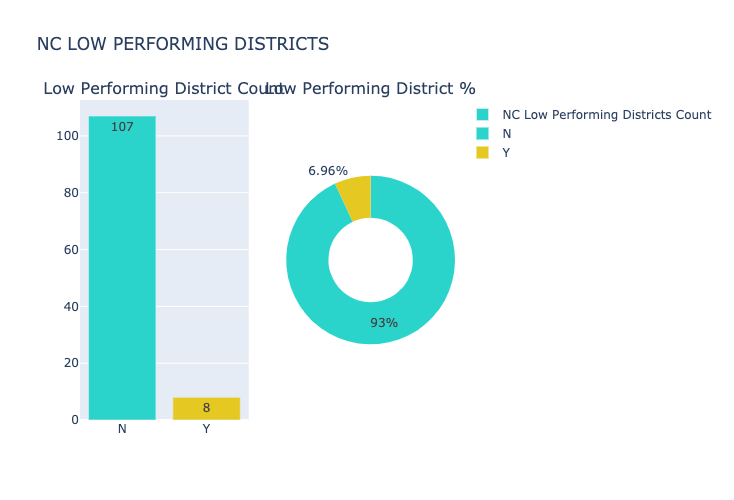

In [117]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Low Performing District Count', 'Low Performing District %'))

fig.add_trace(go.Bar(x=lowperf_dist_2019['lp_district'], 
                     y=lowperf_dist_2019['count'],
                     name='NC Low Performing Districts Count', 
                     text=lowperf_dist_2019['count'],
                     textposition = 'auto',
                     marker=dict(color=['#2ad4cb','#e6c822'])), row=1, col=1)

fig.add_trace(go.Pie(labels=lowperf_dist_2019['lp_district'], 
                     values=lowperf_dist_2019['count'], 
                     name='NC Low Performing Districts %',
                     hole = 0.5,
                     marker=dict(colors=['#2ad4cb','#e6c822'])), row=1, col=2)

fig.update_layout(height=500, 
                  title_text='NC LOW PERFORMING DISTRICTS',
                  showlegend=True)

fig.show()

In [118]:
lps_2019_y = lowperf_2019.loc[lowperf_2019['lp_school'] == 'Y']
lps_2019_n = lowperf_2019.loc[lowperf_2019['lp_school'] == 'N']
lpd_2019_y = lowperf_2019.loc[lowperf_2019['lp_district'] == 'Y']
lpd_2019_n = lowperf_2019.loc[lowperf_2019['lp_district'] == 'N']

In [119]:
lpd_2019_y = lpd_2019_y.sort_values(by='lp_num', ascending=False)

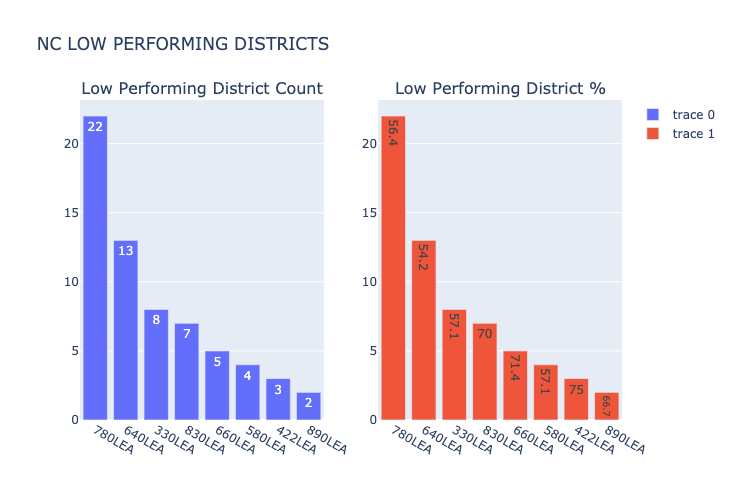

In [120]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=('Low Performing District Count', 'Low Performing District %'))

fig.add_trace(go.Bar(x=lpd_2019_y['agency_code'], 
                     y=lpd_2019_y['lp_num'],
                     text=lpd_2019_y['lp_num'],
                     textposition = 'auto'), row=1, col=1)

fig.add_trace(go.Bar(x=lpd_2019_y['agency_code'], 
                     y=lpd_2019_y['lp_num'],
                     text=lpd_2019_y['lp_pct'],
                     textposition = 'auto'), row=1, col=2)

fig.update_layout(height=500, 
                  title_text='NC LOW PERFORMING DISTRICTS',
                  showlegend=True)

fig.show()

In [121]:
lowperf_2019.loc[lowperf_2019['agency_code'] == '410LEA']

,year,district_code,school_code,agency_code,lp_school,rlp_school,clpc_school,lp_num,lp_den,lp_pct,lp_district
3900,2019,410,0,410LEA,NaN,NaN,NaN,35.0,117.0,29.9,N


In [122]:
guilford_2019_p1 = guilford_2019_p.loc[guilford_2019_p['Role_LEA410'] == 'Teacher Subtotal']
guilford_race_p = pd.melt(guilford_2019_p1, value_vars=['Race White', 'Race Black', 'Race Other'])
guilford_race_p = guilford_race_p.rename(columns={'variable':'race', 'value':'count'})
guilford_race_p

,race,count
0,Race White,2964
1,Race Black,1470
2,Race Other,317


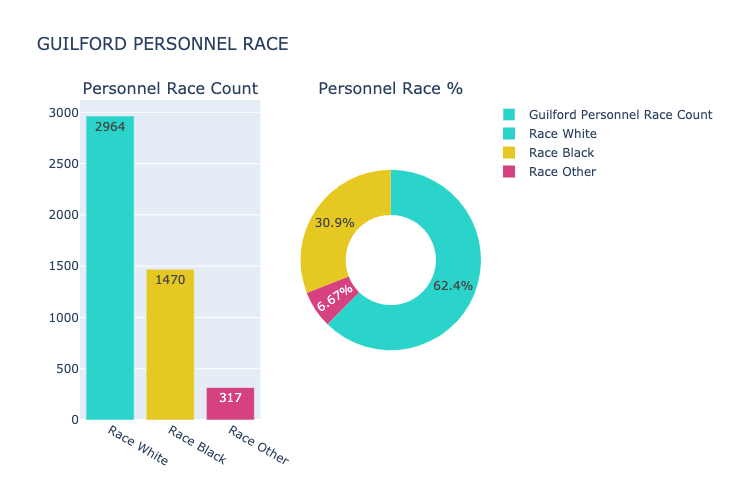

In [123]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Personnel Race Count', 'Personnel Race %'))

fig.add_trace(go.Bar(x=guilford_race_p['race'], 
                     y=guilford_race_p['count'],
                     name='Guilford Personnel Race Count', 
                     text=guilford_race_p['count'],
                     textposition = 'auto',
                     marker=dict(color=['#2ad4cb','#e6c822', '#d64280'])), row=1, col=1)

fig.add_trace(go.Pie(labels=guilford_race_p['race'], 
                     values=guilford_race_p['count'], 
                     name='Guilford Personnel Race %',
                     hole = 0.5,
                     marker=dict(colors=['#2ad4cb','#e6c822', '#d64280'])), row=1, col=2)

fig.update_layout(height=500, 
                  title_text='GUILFORD PERSONNEL RACE',
                  showlegend=True)

fig.show()

In [124]:
indian = (guilford_2019_s['INDIAN Male'].sum() + guilford_2019_s['INDIAN Female'].sum())
asian = (guilford_2019_s['ASIAN Male'].sum() + guilford_2019_s['ASIAN Female'].sum())
hispanic = (guilford_2019_s['HISPANIC Male'].sum() + guilford_2019_s['HISPANIC Female'].sum())
black = (guilford_2019_s['BLACK Male'].sum() + guilford_2019_s['BLACK Female'].sum())
white = (guilford_2019_s['WHITE Male'].sum() + guilford_2019_s['WHITE Female'].sum())
pacific = (guilford_2019_s['PACIFIC ISLAND  Male'].sum() + guilford_2019_s['PACIFIC ISLAND  Female'].sum())
twoormore = (guilford_2019_s['TWO OR MORE Male'].sum() + guilford_2019_s['TWO OR MORE Female'].sum())

values_s = [white, black, hispanic, asian, indian, pacific, twoormore]
columns_s = ['White', 'Black', 'Hispanic', 'Asian', 'Indian', 'Pacific', 'Two+']

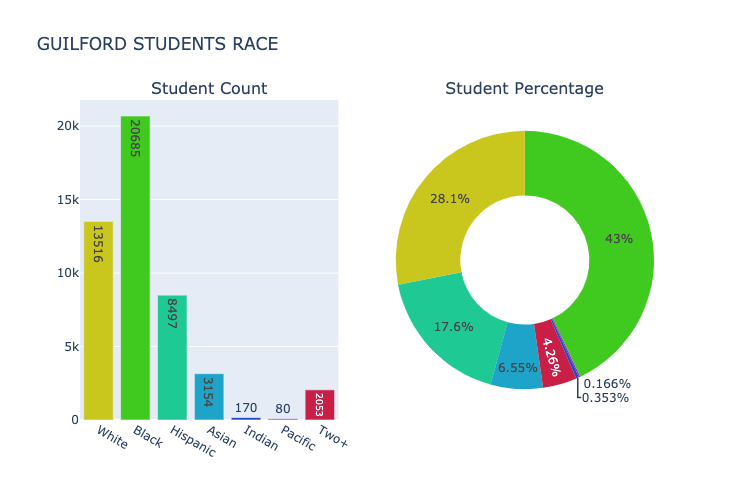

In [125]:
colors = ['#c9c61e', '#40c91e', '#1ec993', '#1ea4c9', '#1e49c9', '#991ec9', '#c91e46']

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Student Count', 'Student Percentage'))

fig.add_trace(go.Bar(x=columns_s, 
                     y=values_s,
                     name='Guilford Student Counts (Race)', 
                     text=values_s,
                     textposition = 'auto',
                     marker=dict(color=colors)), row=1, col=1)

fig.add_trace(go.Pie(labels=columns_s, 
                     values=values_s, 
                     name='Student Percentage',
                     hole = 0.5,
                     marker=dict(colors=colors)), row=1, col=2)


fig.update_layout(height=500, 
                  width = 850,
                  title_text='GUILFORD STUDENTS RACE',
                  showlegend=False)
fig.show()

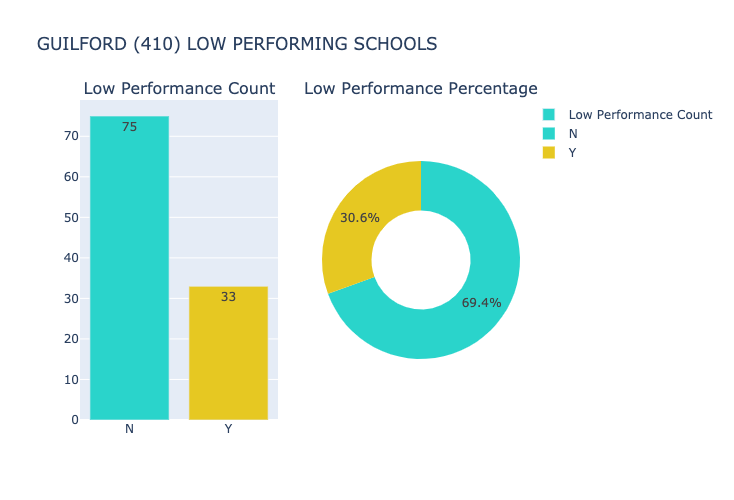

In [105]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]],
                    subplot_titles=('Low Performance Count', 'Low Performance Percentage'))

fig.add_trace(go.Bar(x=lp_values['LP_School'],
                     y=lp_values['count'], 
                     name='Low Performance Count', 
                     text=lp_values['count'],
                     textposition = 'auto',
                     marker=dict(color=['#2ad4cb','#e6c822'])), row=1, col=1)

fig.add_trace(go.Pie(labels=lp_values['LP_School'], 
                     values=lp_values['count'], 
                     name='Low Performance Percentage',
                     hole = 0.5,
                     marker=dict(colors=['#2ad4cb','#e6c822'])), row=1, col=2)


fig.update_layout(height=500, 
                  title_text='GUILFORD (410) LOW PERFORMING SCHOOLS',
                  showlegend=True)

fig.show()